#  Курсовая работа

Дана физическая модель теплопроводящей стенки с переменным коэффициентом теплопроводности и распределенными источниками тепла отделяющей гермообъем от внешней высокотемпературной газовой среды. Определить стационарное распределение температуры. Разработать схему вычислений на основе  численным методом прогонки

\begin{equation*}
 \begin{cases}
   \frac{\partial k(x)}{\partial x}\frac{\partial T(x)}{\partial x} = f(x), 
   \\
   \alpha_1(T_1 - T(0)) = \left. k(0)\frac{\partial T(x)}{\partial x}\right|_{x=0},
   \\
   \alpha_2(T_2 - T(h)) = \left. -k(h)\frac{\partial T(x)}{\partial x}\right|_{x=h}
 \end{cases}
\end{equation*}

импорт используемых библиотек

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

Константы

In [2]:
length = 100 / 1000
a_const = 50
b_const = -200
#b_const = 0
c_const = -10
#c_const = 0
d = 0.05 / 1000
e = 1
n = 10
h = length / (n - 1)

Константы на границе

In [ ]:
#alpha_const_1 = 40000
alpha_const_1 = 25
#alpha_const_2 = 40000
alpha_const_2 = 46.5
temp_const_1 = 20
temp_const_2 = 800

Вычисление распределения источников и теплопроводности

In [3]:
k, f_const, a, b, c, f = [], [], [], [], [], []

for i in range(n):
    k.append(a_const + b_const * i * h)
    f_const.append(c_const*math.exp(-d * (i * h - h / e)**2))

Константы трехдиагональной матрицы

In [ ]:
for i in range(n):
    if i == 0:
        a.append(0)
        c.append((-k[i] / h)-alpha_const_1)
        b.append(k[i] / h)
    elif i == n-1:
        a.append(k[i] / h)
        c.append((-k[i] / h)-alpha_const_2)
        b.append(0)
    else:
        a.append((k[i] / h ** 2) - b_const / 2 * h)
        c.append(-2 * k[i] / h ** 2)
        b.append((k[i] / h ** 2) + b_const / 2 * h)

Проверка на условие применимости прогонки

In [5]:
m = 0
s = 0
for i in range(1,n-1):
    s += 1
    if abs(float(c[i])) >= abs(float(a[i])) + abs(float(b[i])):
        m += 1
print('uslovie primenenie metoda progonki: ',m == s)

uslovie primenenie metoda progonki:  True


Добавление граничный условий к вектору правых частей

In [6]:
for i in range(n):
    if i==0:
        f.append(-alpha_const_1*temp_const_1)
    elif i==n-1:
        f.append(-alpha_const_2*temp_const_2)
    else:
        f.append(f_const[i])

Вычисление значений методом прогонки

In [7]:
alpha,beta,x=[],[],[0]*n
for i in range(n):
    if i == 0:
        alpha.append(-b[i]/c[i])
        beta.append(f[i]/c[i])
    else:
        alpha.append(-b[i] / (a[i] * alpha[i - 1] + c[i]))
        beta.append((f[i] - a[i] * beta[i - 1]) / (a[i] * alpha[i - 1] + c[i]))
for i in range(n-1,-1,-1):
    if i ==n-1:
        x[i]=beta[i]
    else:
        x[i]=alpha[i]*x[i+1]+beta[i]

Задание матрицы

In [8]:
a_matrix = [0] * (n)
for i in range((n)): a_matrix[i] = [0] * (n)
for i in range(1,n):
    a_matrix[i][i-1]=a[i]
for i in range(n-1):
    a_matrix[i][i+1]=b[i]
for i in range(n):
    a_matrix[i][i]=c[i]

z = np.linalg.solve(a_matrix, f)

рассчет разности решений

In [9]:
difference = [0]*len(z)
for i in range(len(z)):
    difference[i] = z[i] - x[i]

вычисление разности потоков

In [10]:
potok_pr, potok_numpy = [],[]
potok_pr.append(-k[0]*(x[1]-x[0])/h)
potok_numpy.append(-k[0]*(z[1]-z[0])/h)
for i in range(1,n-1):
    potok_pr.append(-k[i] * (x[i+1] - x[i-1])/2/h)
    potok_numpy.append((-k[i] * (z[i+1] - z[i-1]))/2/h)
potok_pr.append(-k[n-1]*(x[n-1]-x[n-2])/h)
potok_numpy.append(-k[n-1]*(z[n-1]-z[n-2])/h)
potok_diff = []
for i in range(n):
    potok_diff.append(potok_pr[i]-potok_numpy[i])

задание шагов 

In [11]:
shag = []
for i in range(n):
    shag.append(h*i)
shag_1 = []
f_2 = []
for i in range(n-2):
    shag_1.append(h*i)
    f_2.append(f[i+1])

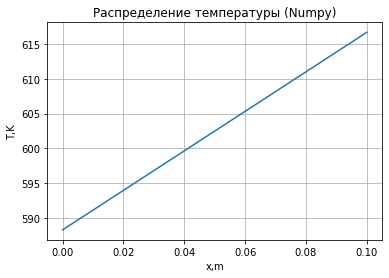

In [12]:
plt.figure(1)
plt.plot(shag, z)
plt.ylabel('T,K')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение температуры (Numpy)', fontdict=None, loc='center', pad=None)
plt.show()

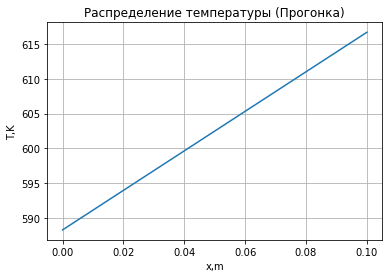

In [13]:
plt.figure(2)
plt.plot(shag, x)
plt.ylabel('T,K')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение температуры (Прогонка)', fontdict=None, loc='center', pad=None)
plt.show()

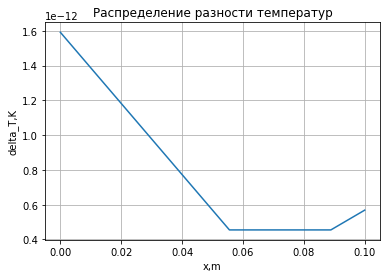

In [14]:
plt.figure(3)
plt.plot(shag, difference)
plt.ylabel('delta_T,K')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение разности температур', fontdict=None, loc='center', pad=None)
plt.show()

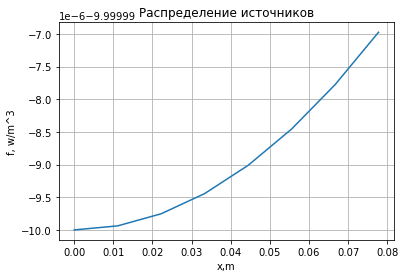

In [15]:
plt.figure(4)
plt.plot(shag_1, f_2)
plt.ylabel('f, w/m^3')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение источников', fontdict=None, loc='center', pad=None)
plt.show()

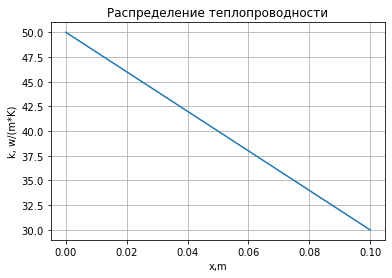

In [16]:
plt.figure(5)
plt.plot(shag, k)
plt.ylabel('k, w/(m*K)')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение теплопроводности', fontdict=None, loc='center', pad=None)
plt.show()

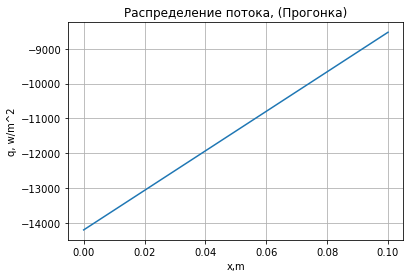

In [17]:
plt.figure(6)
plt.plot(shag, potok_pr)
plt.ylabel('q, w/m^2')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение потока, (Прогонка)', fontdict=None, loc='center', pad=None)
plt.show()

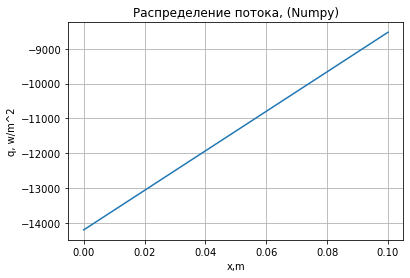

In [18]:
plt.figure(7)
plt.plot(shag, potok_numpy)
plt.ylabel('q, w/m^2')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение потока, (Numpy)', fontdict=None, loc='center', pad=None)
plt.show()

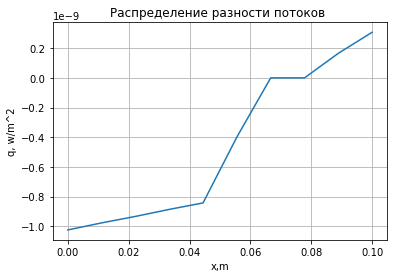

In [19]:
plt.figure(8)
plt.plot(shag, potok_diff)
plt.ylabel('q, w/m^2')
plt.xlabel('x,m')
plt.grid()
plt.title('Распределение разности потоков ', fontdict=None, loc='center', pad=None)
plt.show()